In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

In [3]:
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

100%|██████████| 170498071/170498071 [00:41<00:00, 4074079.89it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
train, val = torch.utils.data.random_split(train_dataset, [40000, 10000])

train_dataloader = torch.utils.data.DataLoader(train, batch_size=1024, shuffle=True, num_workers=2)
val_dataloader = torch.utils.data.DataLoader(val, batch_size=1024, shuffle=False, num_workers=2)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1024, shuffle=False, num_workers=2)

In [5]:
for data, label in train_dataloader:
    print(data.shape)
    print(label.shape)
    print(label)
    break

torch.Size([1024, 3, 32, 32])
torch.Size([1024])
tensor([9, 2, 5,  ..., 1, 5, 6])


In [15]:
class VGG_custom(nn.Module): #VGG16
    def __init__(self):
        super(VGG_custom, self).__init__()
        # 32x32x3
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1) # 32 - 3
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.max_pool1 = nn.MaxPool2d(2) # 16x16x64

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.relu4 = nn.ReLU()
        self.max_pool2 = nn.MaxPool2d(2) # 8x8x128

        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.relu5 = nn.ReLU()
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.relu6 = nn.ReLU()
        self.max_pool3 = nn.MaxPool2d(2) # 4x4x256

        self.conv7 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.relu7 = nn.ReLU()
        self.conv8 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.relu8 = nn.ReLU()
        self.conv9 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.relu9 = nn.ReLU()
        self.max_pool4 = nn.MaxPool2d(2) # 2x2x512

        self.conv10 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.relu10 = nn.ReLU()
        self.conv11 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.relu11 = nn.ReLU()
        self.conv12 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.relu12 = nn.ReLU()
        self.max_pool5 = nn.MaxPool2d(2) # 1x1x512

        self.fc1 = nn.Linear(512, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.max_pool1(self.relu2(self.conv2(x)))

        x = self.relu3(self.conv3(x))
        x = self.max_pool2(self.relu4(self.conv4(x)))

        x = self.relu5(self.conv5(x))
        x = self.max_pool3(self.relu6(self.conv6(x)))

        x = self.relu7(self.conv7(x))
        x = self.relu8(self.conv8(x))
        x = self.max_pool4(self.relu9(self.conv9(x)))

        x = self.relu10(self.conv10(x))
        x = self.relu11(self.conv11(x))
        x = self.max_pool5(self.relu12(self.conv12(x)))

        x = x.view(-1, 512)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x



In [16]:
model = VGG_custom()
model = model.cuda()

criterion = nn.CrossEntropyLoss()

learning_rate = 0.01
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [17]:
model

VGG_custom(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu5): ReLU()
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu6): ReLU()
  (max_pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv7): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu7): ReLU()
  (conv8): Conv2d(512, 512, kernel_size=(3, 3

In [18]:
epochs = 20

train_loss = []
valid_loss = []
train_accuracy = []
valid_accuracy = []

for epoch in range(epochs):
    iter_loss = 0.0
    correct = 0
    iterations = 0

    model.train()

    for i, (items, classes) in enumerate(train_dataloader):
        items = Variable(items)
        classes = Variable(classes)

        # 
        items = items.cuda()
        classes = classes.cuda()

        optimizer.zero_grad()
        outputs = model(items)
        loss = criterion(outputs, classes)
        iter_loss += loss.item()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == classes.data).sum()
        iterations += 1
    
    train_loss.append(iter_loss/iterations)
    # Record the training accuracy
    train_accuracy.append(100 * correct.cpu() / float(len(train_dataloader.dataset)))

    loss = 0.0
    correct = 0
    iterations = 0

    model.eval()

    for i, (items, classes) in enumerate(val_dataloader):
        items = Variable(items)
        classes = Variable(classes)

        items = items.cuda()
        classes = classes.cuda()

        outputs = model(items)
        loss += criterion(outputs, classes).item()

        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == classes.data).sum()

        iterations += 1

    valid_loss.append(loss/iterations)
    correct_scalar = np.array([correct.clone().cpu()])[0]
    valid_accuracy.append(correct_scalar / len(val_dataloader.dataset) * 100.0)

    print ('Epoch %d/%d, Tr Loss: %.4f, Tr Acc: %.4f, Val Loss: %.4f, Val Acc: %.4f'
           %(epoch+1, epochs, train_loss[-1], train_accuracy[-1], 
             valid_loss[-1], valid_accuracy[-1]))

Epoch 1/20, Tr Loss: 2.3057, Tr Acc: 9.7575, Val Loss: 2.3027, Val Acc: 10.0400
Epoch 2/20, Tr Loss: 2.2418, Tr Acc: 13.6350, Val Loss: 2.1110, Val Acc: 17.7600
Epoch 3/20, Tr Loss: 2.0445, Tr Acc: 19.1875, Val Loss: 1.9950, Val Acc: 22.1200
Epoch 4/20, Tr Loss: 1.9182, Tr Acc: 22.3750, Val Loss: 1.8587, Val Acc: 23.9100
Epoch 5/20, Tr Loss: 1.7975, Tr Acc: 27.4075, Val Loss: 1.7351, Val Acc: 30.3300
Epoch 6/20, Tr Loss: 1.6934, Tr Acc: 33.6650, Val Loss: 1.7068, Val Acc: 34.5800
Epoch 7/20, Tr Loss: 1.5842, Tr Acc: 39.3775, Val Loss: 1.4988, Val Acc: 41.2000
Epoch 8/20, Tr Loss: 1.4466, Tr Acc: 44.5225, Val Loss: 1.5885, Val Acc: 42.0400
Epoch 9/20, Tr Loss: 1.3864, Tr Acc: 47.8300, Val Loss: 1.3045, Val Acc: 51.8100
Epoch 10/20, Tr Loss: 1.2582, Tr Acc: 52.9000, Val Loss: 1.3513, Val Acc: 51.9200
Epoch 11/20, Tr Loss: 1.1960, Tr Acc: 56.1975, Val Loss: 1.2017, Val Acc: 56.7100
Epoch 12/20, Tr Loss: 1.0990, Tr Acc: 59.6575, Val Loss: 1.2356, Val Acc: 56.2700
Epoch 13/20, Tr Loss: 1.03

## Notes
- We can see that it is still training, and we can proceed with more epochs (20 epoch is not enough, of course - the original VGG authors (Oxford group) were training this network for a week). I will stop here, since it is taking a lot of time - training is performed on my local laptop

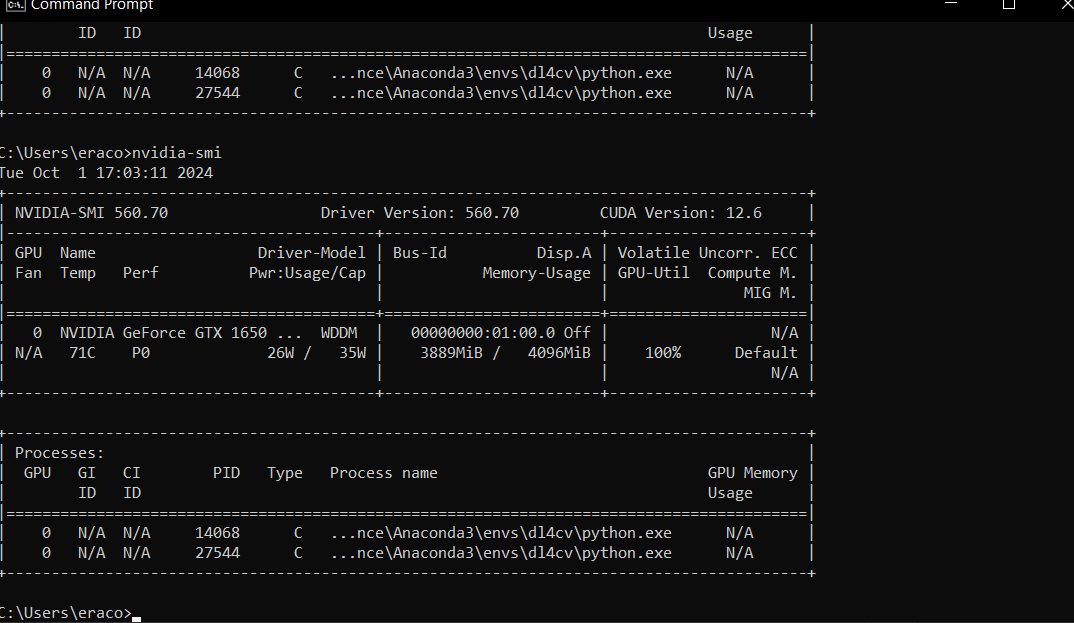